In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
adaptive = pd.read_csv('../bin/release/problems/bubble2D_adaptive.csv', header=0)
static = pd.read_csv('../bin/release/problems/bubble2D_static.csv', header=0)
adaptive.head()

,min_size,max_size,mean_size,n_cells,n_min,n_max,time,dt
0,0.000016,0.000516,0.000043,5184,2864,54,2.337970e-09,2.337970e-09
1,0.000016,0.000516,0.000041,5760,3376,54,4.669230e-09,2.331260e-09
2,0.000016,0.000516,0.000037,6804,4400,54,6.996130e-09,2.326900e-09
3,0.000016,0.000516,0.000037,6804,4400,54,9.394700e-09,2.398570e-09
4,0.000016,0.000516,0.000037,6804,4400,54,1.173270e-08,2.338010e-09


In [3]:
print(len(adaptive))
print(len(static))

1353
1424


In [4]:
static_cell_size = static['min_size'][0]
adaptive_cell_size = adaptive['min_size'].mean()
print(static_cell_size, adaptive_cell_size)
static_cell_size / adaptive_cell_size

1.6e-05 1.61374e-05


0.9914856172617647

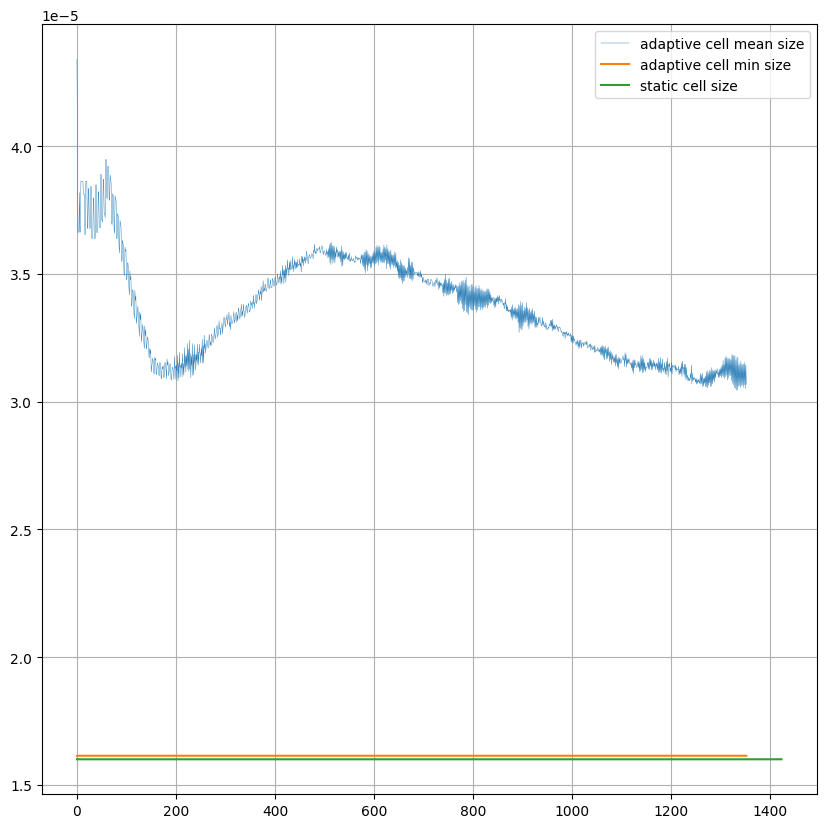

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(adaptive['mean_size'], label='adaptive cell mean size', linewidth=0.3)
plt.plot(adaptive['min_size'], label='adaptive cell min size')
plt.plot(static['mean_size'], label='static cell size')
plt.title("cell sizes")
plt.grid()
plt.legend()
plt.show()

In [6]:
adaptive['n_cells'].describe()

count    1353.000000
mean     8565.711752
std       737.554973
min      5184.000000
25%      8442.000000
50%      8706.000000
75%      8967.000000
max      9642.000000
Name: n_cells, dtype: float64

In [7]:
static['n_cells'].describe()

count      1424.0
mean     125000.0
std           0.0
min      125000.0
25%      125000.0
50%      125000.0
75%      125000.0
max      125000.0
Name: n_cells, dtype: float64

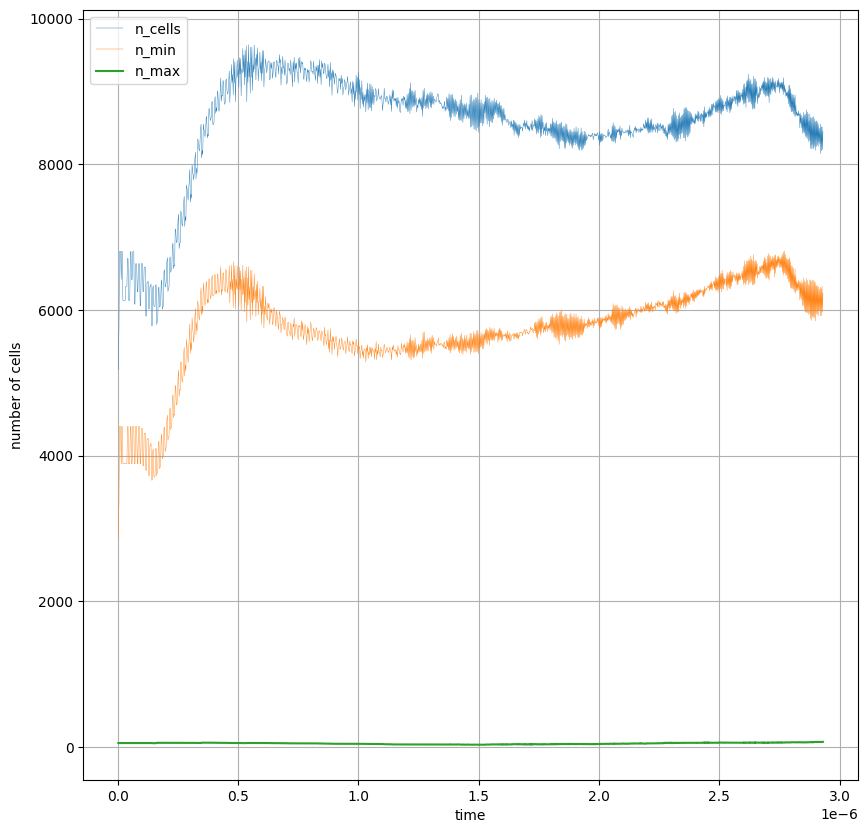

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(adaptive['time'], adaptive['n_cells'], label='n_cells', linewidth=0.3)
plt.plot(adaptive['time'], adaptive['n_min'], label='n_min', linewidth=0.3)
plt.plot(adaptive['time'], adaptive['n_max'], label='n_max')
plt.xlabel('time')
plt.ylabel('number of cells')
plt.grid()
plt.legend()
plt.show()

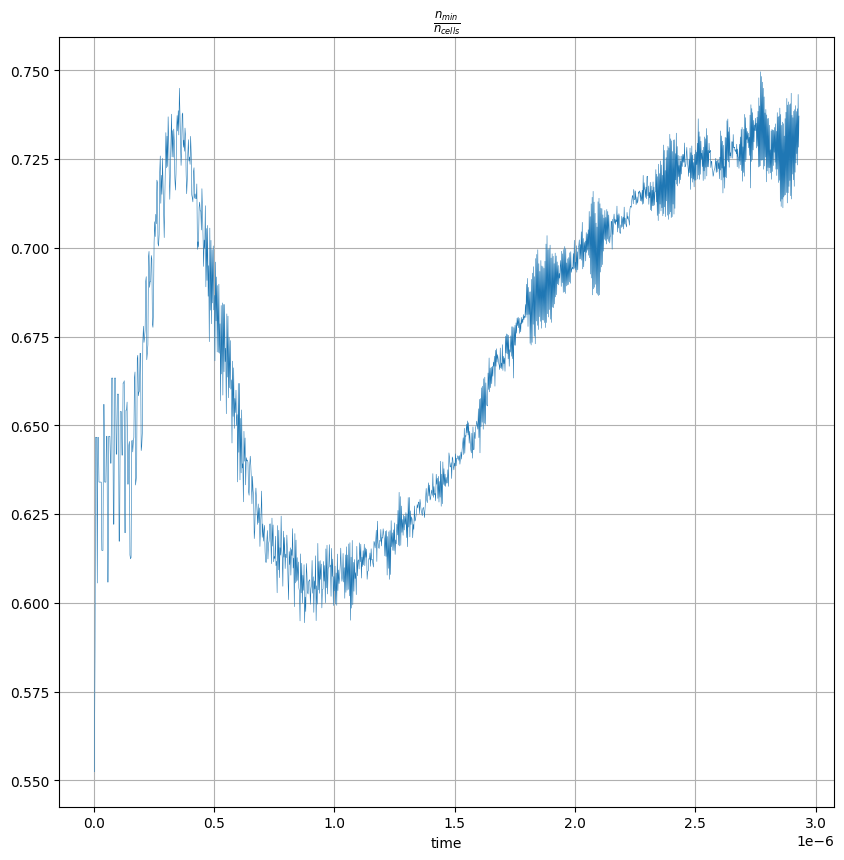

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(adaptive['time'], adaptive['n_min'] / adaptive['n_cells'], linewidth=0.4)
plt.title(r'$\frac{n_{min}}{n_{cells}}$')
plt.xlabel('time')
plt.grid()
plt.show()

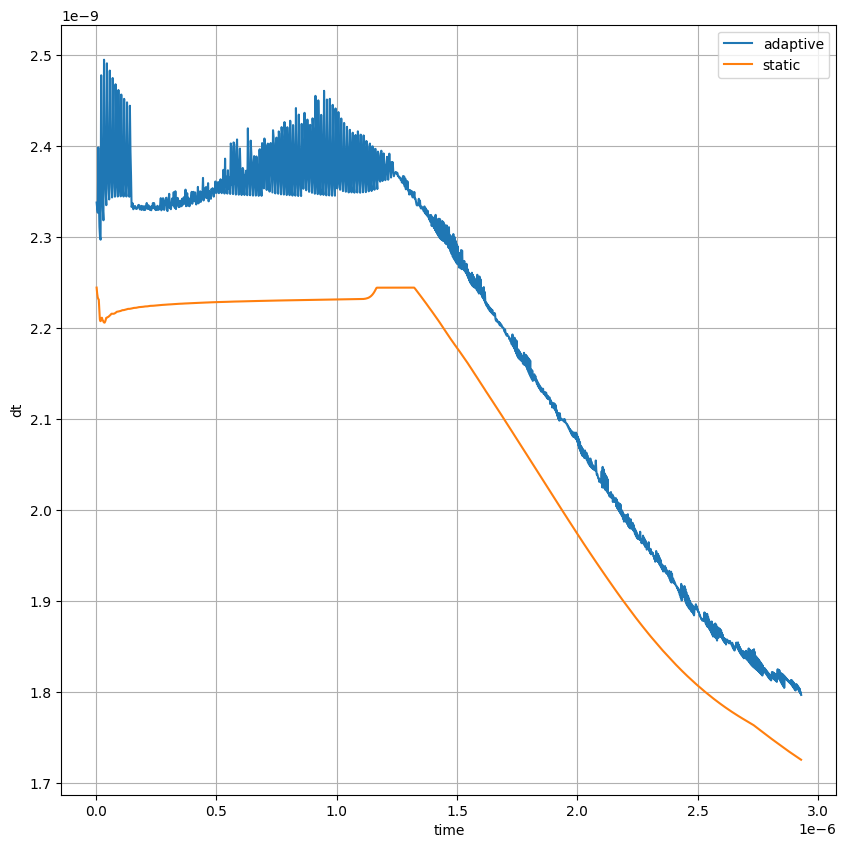

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(adaptive['time'], adaptive['dt'], label='adaptive')
plt.plot(static['time'], static['dt'], label='static')
plt.ylabel('dt')
plt.xlabel('time')
plt.grid()
plt.legend()
plt.show()